<a href="https://colab.research.google.com/github/prd-dahal/AI_Projects/blob/master/MNIST_(Handwriting_Recognition_MINIMUM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras 
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D,Flatten, Dropout
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
#model 
model = Sequential([

  Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'),
	MaxPooling2D(),
	Dropout(0.2),
	Flatten(),
	Dense(128, activation='relu'),
	Dense(num_classes, activation='softmax')                  
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
________________________________________________

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size=32,epochs=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 42s 694us/step - loss: 0.1393 - accuracy: 0.9583 - val_loss: 0.0539 - val_accuracy: 0.9833
Epoch 2/20
60000/60000 [==============================] - 41s 681us/step - loss: 0.0501 - accuracy: 0.9847 - val_loss: 0.0415 - val_accuracy: 0.9863
Epoch 3/20
60000/60000 [==============================] - 41s 679us/step - loss: 0.0331 - accuracy: 0.9891 - val_loss: 0.0372 - val_accuracy: 0.9887
Epoch 4/20
60000/60000 [==============================] - 41s 686us/step - loss: 0.0252 - accuracy: 0.9919 - val_loss: 0.0439 - val_accuracy: 0.9866
Epoch 5/20
60000/60000 [==============================] - 41s 679us/step - loss: 0.0192 - accuracy: 0.9938 - val_loss: 0.0384 - val_accuracy: 0.9884
Epoch 6/20
60000/60000 [==============================] - 41s 679us/step - loss: 0.0153 - accuracy: 0.9949 - val_loss: 0.0435 - val_accuracy: 0.9871
Epoch 7/20
60000/60000 [==============================] 

In [0]:
model.save('mnist.h5')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


The predicted value for the given image is 3


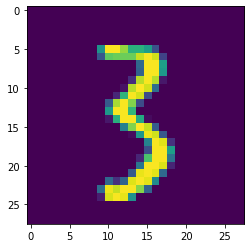

In [34]:
import matplotlib.pyplot as plt
import numpy as np
#feel free to change this index to see other digits being predicted
# if want to upload the image use the shape of (1,28,28,1) for the predict method
# also use the binary filter for accuracy 
index = 112

image = X_test[index].reshape((28,28))
plt.imshow(image)
predict_image = X_test[index].reshape((1,28,28,1))
predicted_array = model.predict(predict_image)
pred_max = predicted_array.max()
value = np.where(predicted_array == pred_max)

print("The predicted value for the given image is {}".format(value[1][0]))